# C-More

## Twitter

In [2]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import time

In [3]:
# Twitter API v2

bearer_token = ''

client = tweepy.Client(bearer_token=bearer_token)

#### 1. Get user's ID

In [3]:
user = client.get_user(username='McDonalds')

In [8]:
user.data.id

71026122

**P:** McDonalds foi uma das empresas utilizadas como exemplo no projecto anterior. A ideia é darmos continuidade a essa abordagem ou podemos usar exemplos reais (clientes da C-More)? Se optarmos por continuar a usar este tipo de empresas, seja de fast-food ou de outra área de actividade qualquer, serão representativos dos atuais e potenciais clientes da C-More?

<span style="color:#0a462f;background-color:#83f2c7">**R:**
    exemplos clientes: Galp, Santander, ... Mas podemos continuar assim para já.
</span>

#### 2. Get user's tweets

In [9]:
user_id = user.data.id

response = client.get_users_tweets(user_id) # defaults to 10 tweets

In [10]:
for tweet in response.data:
    print(tweet.id)
    print(tweet.text)

1539550188351766529
@Miwupy since the pricing depends on location and other factors, you can always download our app for the latest deals in your area! 😊
1539549944637530113
@BBTGKaybaby707 we'd like to know more about this. tell us here: https://t.co/g1D0CJdc1j
1539549785182461953
@iFOMOd each restaurant determines its own hours of operations. for more info or to locate a store with different hours near you, please visit: https://t.co/nHCY6Kw35z
1539524772840759297
@Saltybucketss our food shouldn't be doing that to you! please share the details here: https://t.co/WhvwT8dw7y
1539520501617401856
@emojoke we don't want to miss a thing with your order. let's connect here: https://t.co/WhvwT8dw7y
1539517030646394880
@mooooody_ menu availability and its timing is up to the store owner's discretion, Anna. you can always check with other nearby stores, here's the link: https://t.co/n4jdHs8UmL
1539499446333018112
@jacquelinamm our food should be cooked to perfection every time, Jackie. do let 

#### 3. Get user's mentions

In [13]:
response = client.get_users_mentions(user_id) # defaults to 10 tweets

for tweet in response.data:
    print(tweet.id)
    print(tweet.text)

1539559575866773505
@McDonalds you only put that shirt on if you want people to be scared of you
1539559237147365378
@McDonalds howdy pardner
1539559200703098884
@RadioShack @McDonalds This might be why you’re going out of business 
#bitcoin fixes this 🎩
1539558964882456578
@McDonalds out here with the audacity to double their breakfast item prices!
1539558839837761538
Beautiful morning to you all @Wendys @FiveGuys @McDonalds @kfc @daniburgz @dominicburgess @elonmusk @MrBeast @mikemajlak @justinbieber @FrencHMonTanA @chrisbrown https://t.co/G3B3Jh5m1L #NFT #NFTNYC #NewYorkerApologize #goodmorning #TheUmbrellaAcademy #FrenchOpen2022 #nftart
1539558826260811776
@Cryptoboot1 @McDonalds As I say, swithering. May just stick to mustard from McD's. Could add @HunterGatherUK ketchup, but want to minimise outside added variables.
Why McDonald's: https://t.co/Al7LqfXEIZ
1539558392406036481
🇺🇸 @McDonalds https://t.co/EKu3OsEIkn
1539558198700658689
@McDonalds im the mdconalds sprite
15395578805543

#### 4. Get user's liked tweets (tweets liked by the user)

In [14]:
response = client.get_liked_tweets(user_id, tweet_fields=["created_at"]) # by default each page returns 100 results
# ID and text fields are the default fields
# extra fields can be added using the tweet_fields parameter
# see the tweet_fields parameter possible values here: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet

In [17]:
for tweet in response.data:
    print(tweet.id, tweet.created_at)
    print(tweet.text + "\n")

1002988756696256512 2018-06-02 19:02:08+00:00
McDonald’s sprite tastes like static

1539292068752801796 2022-06-21 17:00:02+00:00
¿ʎpɐǝɹ noʎ ǝɹ∀ 

#FireEmblem Warriors: Three Hopes releases in 3 days on #NintendoSwitch!

Will you journey with Claude? https://t.co/h6QhcInjT9

1539346894907793408 2022-06-21 20:37:54+00:00
Darth Vader is now a boss on the Fortnite map, and if you defeat him you can take his lightsaber to use in the game! #FortniteVibin #DarthVader https://t.co/jLKpOZ2SLF

1539338101323141121 2022-06-21 20:02:57+00:00
Okay, so, got some of the frosting, got some of the ants

Say 54% of the frosting and 44% of the ants

Servers are starting to look better but there may be some teething issues whilst all bajillion of you try to play at once

Thanks for baring with us as we continue fixing it!! https://t.co/3JzzRNYr27

1539355261315342336 2022-06-21 21:11:08+00:00
gamers on a boat https://t.co/c7egFb0Lf3

1539360060563939328 2022-06-21 21:30:13+00:00
What makes a Spartan SOUN

**P:** Temos interesse em analisar estes dados - tweets do próprio utilizador (cliente), referências ao utilizador (@user) e likes do utilizador, por exemplo - separadamente? Poderão ser úteis para calcular algumas métricas sobre a atividade do utilizador e como a comunidade está a reagir.

<span style="color:#0a462f;background-color:#83f2c7">**R:**
    Importante usar isto também!
</span>

#### 5. Get tweet's liking users (info about users that liked a given tweet)

In [22]:
tweet_id = 1460323737035677698 # from tweepy examples

response = client.get_liking_users(tweet_id, user_fields=["profile_image_url"])
# ID, name and username fields are the default fields
# extra fields can be added using the user_fields parameter
# see the user_fields parameter possible values here: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user

In [23]:
for user in response.data:
    print(user.username, user.profile_image_url)

bng_gito https://pbs.twimg.com/profile_images/1537916741942054913/NreaqQ9y_normal.jpg
SenuFoster https://pbs.twimg.com/profile_images/1539412899252281351/OkGowp_E_normal.jpg
AhmadTo87727088 https://pbs.twimg.com/profile_images/1530890357134618625/fsr2tRGh_normal.jpg
MirimoZachee https://pbs.twimg.com/profile_images/1533514004492169216/nu43ADJd_normal.jpg
SS2face https://pbs.twimg.com/profile_images/1522285478816407553/Wf2qao7J_normal.jpg
tiwarigaurav_ https://pbs.twimg.com/profile_images/1534556450508288000/QJ9TfMJ6_normal.jpg
Hyper_Hussam https://pbs.twimg.com/profile_images/1392320654293315585/cC7PI8Si_normal.jpg
SiphesihleMoola https://pbs.twimg.com/profile_images/1462893111378681857/IRCJcCni_normal.jpg
jccprimero https://pbs.twimg.com/profile_images/871708971840802816/9vo42AWn_normal.jpg
dadeh_kav https://pbs.twimg.com/profile_images/1512776599464288263/t9_lr3iU_normal.jpg
papitramdani https://pbs.twimg.com/profile_images/1416361155149254658/7dNb2K4U_normal.jpg
meyor__1 https://pbs

**P:** Temos interesse em obter alguma informação sobre quem gosta dos tweets do utilizador? Poderá ser útil para se ter uma ideia do perfil de quem interage mais com este utilizador, por exemplo.

<span style="color:#0a462f;background-color:#83f2c7">**R:**
    Sim, mas no futuro. Ver como guardar isto. Extrair número de seguidores de quem interage com a empresa, por exemplo, para identificar "influencers".
</span>

#### 6. Get recent tweets count

In [24]:
query_1 = "McDonalds -is:retweet" # maches string McDonalds and excludes retweets

query_2 = "@McDonalds" # matches tweets that mention this username (including the @)

In [25]:
response = client.get_recent_tweets_count(query_1, granularity="day") # count of tweets for the last 7 days
# granularity can be minute, hour or day

In [26]:
for count in response.data:
    print(count)

{'end': '2022-06-16T00:00:00.000Z', 'start': '2022-06-15T11:39:12.000Z', 'tweet_count': 5745}
{'end': '2022-06-17T00:00:00.000Z', 'start': '2022-06-16T00:00:00.000Z', 'tweet_count': 9536}
{'end': '2022-06-18T00:00:00.000Z', 'start': '2022-06-17T00:00:00.000Z', 'tweet_count': 7871}
{'end': '2022-06-19T00:00:00.000Z', 'start': '2022-06-18T00:00:00.000Z', 'tweet_count': 7572}
{'end': '2022-06-20T00:00:00.000Z', 'start': '2022-06-19T00:00:00.000Z', 'tweet_count': 7465}
{'end': '2022-06-21T00:00:00.000Z', 'start': '2022-06-20T00:00:00.000Z', 'tweet_count': 7858}
{'end': '2022-06-22T00:00:00.000Z', 'start': '2022-06-21T00:00:00.000Z', 'tweet_count': 7334}
{'end': '2022-06-22T11:39:12.000Z', 'start': '2022-06-22T00:00:00.000Z', 'tweet_count': 3071}


In [29]:
response = client.get_recent_tweets_count(query_1, granularity="hour")

for count in response.data:
    print(count)

{'end': '2022-06-15T12:00:00.000Z', 'start': '2022-06-15T11:42:56.000Z', 'tweet_count': 91}
{'end': '2022-06-15T13:00:00.000Z', 'start': '2022-06-15T12:00:00.000Z', 'tweet_count': 464}
{'end': '2022-06-15T14:00:00.000Z', 'start': '2022-06-15T13:00:00.000Z', 'tweet_count': 345}
{'end': '2022-06-15T15:00:00.000Z', 'start': '2022-06-15T14:00:00.000Z', 'tweet_count': 452}
{'end': '2022-06-15T16:00:00.000Z', 'start': '2022-06-15T15:00:00.000Z', 'tweet_count': 629}
{'end': '2022-06-15T17:00:00.000Z', 'start': '2022-06-15T16:00:00.000Z', 'tweet_count': 540}
{'end': '2022-06-15T18:00:00.000Z', 'start': '2022-06-15T17:00:00.000Z', 'tweet_count': 530}
{'end': '2022-06-15T19:00:00.000Z', 'start': '2022-06-15T18:00:00.000Z', 'tweet_count': 459}
{'end': '2022-06-15T20:00:00.000Z', 'start': '2022-06-15T19:00:00.000Z', 'tweet_count': 549}
{'end': '2022-06-15T21:00:00.000Z', 'start': '2022-06-15T20:00:00.000Z', 'tweet_count': 458}
{'end': '2022-06-15T22:00:00.000Z', 'start': '2022-06-15T21:00:00.000Z'

In [30]:
response = client.get_recent_tweets_count(query_2, granularity="day")

for count in response.data:
    print(count)

{'end': '2022-06-16T00:00:00.000Z', 'start': '2022-06-15T11:46:45.000Z', 'tweet_count': 2623}
{'end': '2022-06-17T00:00:00.000Z', 'start': '2022-06-16T00:00:00.000Z', 'tweet_count': 3443}
{'end': '2022-06-18T00:00:00.000Z', 'start': '2022-06-17T00:00:00.000Z', 'tweet_count': 2729}
{'end': '2022-06-19T00:00:00.000Z', 'start': '2022-06-18T00:00:00.000Z', 'tweet_count': 3350}
{'end': '2022-06-20T00:00:00.000Z', 'start': '2022-06-19T00:00:00.000Z', 'tweet_count': 2880}
{'end': '2022-06-21T00:00:00.000Z', 'start': '2022-06-20T00:00:00.000Z', 'tweet_count': 2496}
{'end': '2022-06-22T00:00:00.000Z', 'start': '2022-06-21T00:00:00.000Z', 'tweet_count': 2964}
{'end': '2022-06-22T11:46:45.000Z', 'start': '2022-06-22T00:00:00.000Z', 'tweet_count': 1279}


In [48]:
for count in response.data[1: -1]: # considerando só dias completos
    print(count['start'][:10]) # considerando só a data (yyyy-mm-dd)
    print(count['tweet_count'])

2022-06-16
3443
2022-06-17
2729
2022-06-18
3350
2022-06-19
2880
2022-06-20
2496
2022-06-21
2964


In [51]:
day = []
tweet_count = []

for count in response.data[1: -1]:
    day.append(count['start'][:10])
    tweet_count.append(count['tweet_count'])

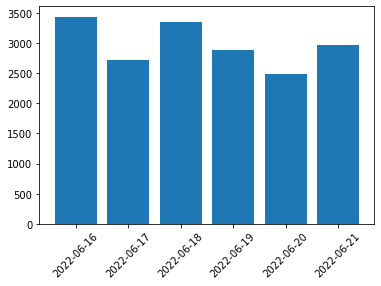

In [57]:
plt.bar(day, tweet_count)
plt.xticks(rotation=45);

**P:** Se um dado utilizador lançar um novo produto, por exemplo, este tipo de análise pode ser útil para determinarmos como está a evoluir o impacto desse produto no mercado ("notoriedade"). Será esta uma análise a considerar?

<span style="color:#0a462f;background-color:#83f2c7">**R:**
    Métrica para o dashboard.
</span>

#### 7. Get recent tweets

In [78]:
query_1 = "McDonalds -is:retweet lang:en"
# maches string McDonalds, excludes retweets and includes only tweets in english

query_2 = "McDonalds -is:retweet lang:pt"
# maches string McDonald, excludes retweets and includes only tweets in portuguese

In [73]:
response = client.search_recent_tweets(query_1, 
                                       end_time="2022-06-22T00:00:00Z", 
                                       max_results=100)

In [74]:
response.data

[<Tweet id=1539397722595377152 text='@trashevrythng @hardevrythng @McDonalds and the breakfast'>,
 <Tweet id=1539397657571074049 text='@trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga'>,
 <Tweet id=1539397645625458688 text="@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. \n\nSumming up the first 2 hours:\n\nColorado Buffaloes 🐃 talk yawn.\nTopCat bracket filler.\nNo phone calls.\n\nYou are all gemstones for reading this thread.\n\nWe made it ... together 🤲 ❤️. https://t.co/F8jWl62

In [79]:
response_2 = client.search_recent_tweets(query_2, 
                                         end_time="2022-06-22T00:00:00Z", 
                                         max_results=100)

In [80]:
response_2.data

[<Tweet id=1539397004882808833 text='Cheguei no Tritts 20:53\nO lanche foi me servido 20:56\n\nMcDonalds sonha com uma eficiência dessa'>,
 <Tweet id=1539396793846202368 text='@WhalmartCoin @McDonalds @Walmart BOMB'>,
 <Tweet id=1539395815395016704 text='@ataldanathalia @McDonalds eu nunca prometi coerência'>,
 <Tweet id=1539395209246785536 text='@McDonalds_BR gente o chef ta famoso mesmo hein'>,
 <Tweet id=1539395134407712768 text='hoje queria relatar um acontecimento que passei no mcdonalds de barueri: fui muito bem atendido por uma moça no toten. é isso!'>,
 <Tweet id=1539394755838222336 text='eu chegando na casa da @marroca_mari e combinando de cozinhar a semana toda, nada de lanches, etc e etc. primeiro obstáculo da segunda e a gente: vamos no @McDonalds? vamos!🤡'>,
 <Tweet id=1539394311221129218 text='Logo eu que amo tanto @McDonalds_BR acabo de ser enganada ☹️ comprei um quarteirão no drive true cheguei em casa e dentro da caixinha tinha um hambúrguer nem queijo tem, era meu jan

<span style="color:#762e1a;background-color:#e7aa99">**Nota:**
    O operador `lang:` da nossa query parece filtar os resultados pela língua que está definida na aplicação e não pela língua dos tweets propriamente ditos. **Para PT não parece ser um problema, mas para EN sim.** Este problema é resolvido de seguida.
</span>

In [85]:
query_3 = "McDonalds -is:retweet"
# maches string McDonalds and excludes retweets

In [86]:
response_3 = client.search_recent_tweets(query_3, 
                                         end_time="2022-06-22T00:00:00Z", 
                                         max_results=10, tweet_fields=['lang'])
# we can use the parameter tweet_fields to choose the tweet language instead of setting the language in the query directly
# see the tweet_fields parameter possible values here: https://docs.tweepy.org/en/stable/v2_models.html#tweet
# or here: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet

In [87]:
response_3.data

[<Tweet id=1539397722595377152 text='@trashevrythng @hardevrythng @McDonalds and the breakfast'>,
 <Tweet id=1539397657571074049 text='@trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga'>,
 <Tweet id=1539397645625458688 text="@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. \n\nSumming up the first 2 hours:\n\nColorado Buffaloes 🐃 talk yawn.\nTopCat bracket filler.\nNo phone calls.\n\nYou are all gemstones for reading this thread.\n\nWe made it ... together 🤲 ❤️. https://t.co/F8jWl62

In [99]:
response.data[0].lang

In [100]:
response_2.data[0].lang

In [101]:
response_3.data[0].lang

'en'

In [102]:
response_3.data[6].lang

'es'

In [103]:
for tweet in response_3.data:
    print(tweet.id, tweet.text, tweet.lang)

1539397722595377152 @trashevrythng @hardevrythng @McDonalds and the breakfast en
1539397657571074049 @trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga en
1539397645625458688 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. 

Summing up the first 2 hours:

Colorado Buffaloes 🐃 talk yawn.
TopCat bracket filler.
No phone calls.

You are all gemstones for reading this thread.

We made it ... together 🤲 ❤️. https://t.co/F8jWl62vYB en
1539397640680521730 -1000 https://t.co/dU6JWqNQsW qst


#### 8. Store recent tweets in dataframe

In [107]:
data = [[tweet.id, tweet.text, tweet.lang] for tweet in response_3.data]

In [110]:
df = pd.DataFrame(data, columns = ['ID', 'Text', 'Language'])

In [113]:
df

,ID,Text,Language
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,en
6,1539397434513756161,No se q ta esperando el McDonalds para quitar ...,es
7,1539397429514190848,@McDonalds I'd rather eat my toes,en
8,1539397385142542336,@stillgray I don't eat at McDonalds...the food...,en
9,1539397376032514048,@thisyou1017 @BastardJolly @stillgray I've had...,en


In [114]:
len(df)

10

In [112]:
df[df['Language'] == 'en']

,ID,Text,Language
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,en
7,1539397429514190848,@McDonalds I'd rather eat my toes,en
8,1539397385142542336,@stillgray I don't eat at McDonalds...the food...,en
9,1539397376032514048,@thisyou1017 @BastardJolly @stillgray I've had...,en


In [115]:
len(df[df['Language'] == 'en'])

8

#### 9. Get info about tweets

With the tweets' IDs, we can get more info about each tweet. We can use a query to get the IDs of the tweets we are interested in and then we can get more info about each tweet with `get_tweets`.

We can also do this in one go with using only `search_recent_tweets` and the corresponding parameters.

In [39]:
query = "McDonalds -is:retweet"
# maches string McDonalds and excludes retweets

response = client.search_recent_tweets(query, 
                                       end_time="2022-06-22T00:00:00Z", 
                                       max_results=10, tweet_fields=['lang'])

In [40]:
data = [[tweet.id, tweet.text, tweet.lang] for tweet in response.data]

df_tweets = pd.DataFrame(data, columns = ['ID', 'Text', 'Language'])

In [41]:
df_tweets

,ID,Text,Language
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,en
6,1539397434513756161,No se q ta esperando el McDonalds para quitar ...,es
7,1539397429514190848,@McDonalds I'd rather eat my toes,en
8,1539397385142542336,@stillgray I don't eat at McDonalds...the food...,en
9,1539397376032514048,@thisyou1017 @BastardJolly @stillgray I've had...,en


In [42]:
df_tweets[df_tweets['Language'] == 'en']['ID'].tolist()

[1539397722595377152,
 1539397657571074049,
 1539397645625458688,
 1539397571013115904,
 1539397434715082754,
 1539397429514190848,
 1539397385142542336,
 1539397376032514048]

In [43]:
tweet_ids = df_tweets[df_tweets['Language'] == 'en']['ID'].tolist()

In [59]:
response = client.get_tweets(tweet_ids, tweet_fields=['public_metrics', 'created_at'])
# Up to 100 ids are allowed in a single request

# see all possible parameters here: https://docs.tweepy.org/en/stable/client.html?#tweepy.Client.get_tweets

In [60]:
response.data[0].public_metrics

{'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}

In [61]:
for tweet in response.data:
    print(tweet.id, tweet.text, tweet.public_metrics, tweet.created_at)

1539397722595377152 @trashevrythng @hardevrythng @McDonalds and the breakfast {'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 0} 2022-06-21 23:59:52+00:00
1539397657571074049 @trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga {'retweet_count': 0, 'reply_count': 1, 'like_count': 4, 'quote_count': 0} 2022-06-21 23:59:36+00:00
1539397645625458688 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. 

Summing up the first 2 hours:

Colorado Buffaloes 🐃 talk yawn.
TopCa

In [62]:
data = [[tweet.id, 
         tweet.text, 
         tweet.public_metrics['retweet_count'], 
         tweet.public_metrics['reply_count'], 
         tweet.public_metrics['like_count'], 
         tweet.public_metrics['quote_count'], 
         tweet.created_at
        ] for tweet in response.data]

df_tweets_info = pd.DataFrame(data, columns = ['ID', 'Text', 'Retweets', 'Replies', 'Likes', 'Quotes', 'Creation Date'])

In [63]:
df_tweets_info

,ID,Text,Retweets,Replies,Likes,Quotes,Creation Date
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,0,0,3,0,2022-06-21 23:59:52+00:00
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,0,1,4,0,2022-06-21 23:59:36+00:00
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,0,2,4,0,2022-06-21 23:59:33+00:00
3,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,0,1,1,0,2022-06-21 23:59:16+00:00
4,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,0,0,1,0,2022-06-21 23:58:43+00:00
5,1539397429514190848,@McDonalds I'd rather eat my toes,0,0,0,0,2022-06-21 23:58:42+00:00
6,1539397385142542336,@stillgray I don't eat at McDonalds...the food...,0,0,0,0,2022-06-21 23:58:31+00:00
7,1539397376032514048,@thisyou1017 @BastardJolly @stillgray I've had...,0,2,0,0,2022-06-21 23:58:29+00:00


In [58]:
# most liked tweets
# with more tweets, we can choose a date interval based on creation date
# based on creation date, we can do some time-series analysis

df_tweets_info[df_tweets_info['Likes'] == df_tweets_info['Likes'].max()]['ID'].tolist()

[1539397657571074049, 1539397645625458688]

**Nota:** Para além das "public metrics", o parâmetro "tweet_fields" permite-nos aceder a outras métricas. Podemos também usar outros parâmetros, que nos dão outro tipo de informação sobre os tweets.

**P:** Estamos interessado em recolher e usar este tipo de métricas?

<span style="color:#0a462f;background-color:#83f2c7">**R:**
   Sim, ver melhor depois. Para já podemos focar-nos nestas essenciais e mais tarde exploramos isto com mais detalhe.
</span>

#### 10. Get all tweets of interest for a given interval of one hour

In [67]:
query = "McDonalds -is:retweet"
# maches string McDonalds and excludes retweets

response = client.search_recent_tweets(query, 
                                       start_time="2022-06-21T23:00:00Z",
                                       end_time="2022-06-22T00:00:00Z", 
                                       max_results=100, tweet_fields=['lang', 'created_at'])

In [69]:
for tweet in response.data:
    print(tweet.id, tweet.text, tweet.lang, tweet.created_at)

1539397722595377152 @trashevrythng @hardevrythng @McDonalds and the breakfast en 2022-06-21 23:59:52+00:00
1539397657571074049 @trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga en 2022-06-21 23:59:36+00:00
1539397645625458688 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. 

Summing up the first 2 hours:

Colorado Buffaloes 🐃 talk yawn.
TopCat bracket filler.
No phone calls.

You are all gemstones for reading this thread.

We made it ... together 🤲 ❤️. https://t.co/F8jWl62vYB en 20

<span style="color:#762e1a;background-color:#e7aa99">**Nota:** 
    Na última hora, há mais do que 100 tweets (valor máximo para `max_results`, por isso temos de usar "pagination".
</span>

In [73]:
# https://docs.tweepy.org/en/stable/v2_pagination.html

for tweet in tweepy.Paginator(client.search_recent_tweets, 
                              query, 
                              start_time="2022-06-21T23:00:00Z", 
                              end_time="2022-06-22T00:00:00Z", 
                              max_results=100, 
                              tweet_fields=['lang', 'created_at']).flatten(limit=250):
    
    print(tweet.id, tweet.text, tweet.lang, tweet.created_at)

1539397722595377152 @trashevrythng @hardevrythng @McDonalds and the breakfast en 2022-06-21 23:59:52+00:00
1539397657571074049 @trashevrythng @hardevrythng @McDonalds respect chicken nuggets and crispy chicken sandwich nigga en 2022-06-21 23:59:36+00:00
1539397645625458688 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse All right I'm tapping out to save my sanity. 

Summing up the first 2 hours:

Colorado Buffaloes 🐃 talk yawn.
TopCat bracket filler.
No phone calls.

You are all gemstones for reading this thread.

We made it ... together 🤲 ❤️. https://t.co/F8jWl62vYB en 20

1539394299099590662 @luchox50 no es odio creo yo, sino q los hinchas boca tiene de costumbre celebrar en el obelisco y parte de esa costumbre es hacer estragos en el mcdonalds que hay en el obelisco jajaj es 2022-06-21 23:46:16+00:00
1539394250843901952 youre next @McDonalds en 2022-06-21 23:46:04+00:00
1539394126663254017 https://t.co/X09kjGbA9T zxx 2022-06-21 23:45:35+00:00
1539394108032024576 @McDonalds 🤮 und 2022-06-21 23:45:30+00:00
1539394098108411906 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7MAJ @MPShrike @Chad_Mcdonalds @thestevenwoods @CumulusNetworks @David_AZJourno @TrajanWealth @RBIrich @KIIM995 @_boog1 @JustinESports @FRomeroAstros @ESPNTucson @PHNX_Wildcats @JoeHealey42 @WaffleHouse .@WaffleHouse: https://t.co/mrHaMjJt8k und 2022-06-21 23:45:28+00:00


1539391130458013702 @amanda_c_rae @McDonalds I order all my burgers with no pickles.  But I like pickles.  Just not on my burger.  Acceptable? en 2022-06-21 23:33:40+00:00
1539391121075449857 @MuuInuOfficial @McDonalds i want a Muu Milshake🥛🥛🥛 en 2022-06-21 23:33:38+00:00
1539391107909525504 I believe that @mcdonalds shorted me 1 single nugget in my order. 💔 en 2022-06-21 23:33:35+00:00
1539391051479142401 @JackBox @jackinthebox ur chiken nuggets made my stomache hurt. my uncle forced me to eat them. @McDonalds is better en 2022-06-21 23:33:21+00:00
1539390980390109184 I remember that 1 time me &amp; Bre had to call McDonalds because they forgot to bring our food outside 😂😂 en 2022-06-21 23:33:04+00:00
1539390909023866881 @PeePosh2 @Scottschlittenh @sceley2011 @Joe_Maya @stargatesg201 @tucsongirl1 @BD97 @NotRichHerrera @koby_thiel @gabeintucson9 @doublez_e @EricDTownsend @ironmikeluke @Free_Lantz @Ben1White @AZJanCR @BearDown_Ray @chango2213 @MaxKIIMFM @jasonscheer @MatthewRandle @KG7M

Since we want all the results for the last hour, we can use the default value (inf) for the parameter limit of flatten.

In [80]:
# save results in a dataframe

data = []

for tweet in tweepy.Paginator(client.search_recent_tweets, 
                              query, 
                              start_time="2022-06-21T23:00:00Z", 
                              end_time="2022-06-22T00:00:00Z", 
                              max_results=100, 
                              tweet_fields=['lang', 'created_at']).flatten(): # default limit is inf
    
    data.append([tweet.id, tweet.text, tweet.lang, tweet.created_at])

df_tweets = pd.DataFrame(data, columns = ['ID', 'Text', 'Language', 'Creation Date'])

In [81]:
df_tweets

,ID,Text,Language,Creation Date
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21 23:59:52+00:00
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21 23:59:36+00:00
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21 23:59:33+00:00
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21 23:59:32+00:00
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21 23:59:16+00:00
...,...,...,...,...
434,1539382784556339201,@hodosch @HeroDividend My wife and I were in M...,en,2022-06-21 23:00:30+00:00
435,1539382754512617474,He looks like McDonalds finally caught up with...,en,2022-06-21 23:00:23+00:00
436,1539382748527349760,special thanks to officer Timothy Lane-Smith o...,en,2022-06-21 23:00:22+00:00
437,1539382720786096128,that mcdonalds on sepcifically how the fuck ar...,en,2022-06-21 23:00:15+00:00


#### 11. Get all tweets of interest for a given interval of one hour and corresponding info

In [83]:
data = []

for tweet in tweepy.Paginator(client.search_recent_tweets, 
                              query, 
                              start_time="2022-06-21T23:00:00Z", 
                              end_time="2022-06-22T00:00:00Z", 
                              max_results=100, 
                              tweet_fields=['lang', 'created_at', 'public_metrics']).flatten(): # default limit is inf
    
    data.append([tweet.id, 
                 tweet.text, 
                 tweet.lang, 
                 tweet.created_at, 
                 tweet.public_metrics['retweet_count'], 
                 tweet.public_metrics['reply_count'], 
                 tweet.public_metrics['like_count'], 
                 tweet.public_metrics['quote_count']
                ])

df_tweets = pd.DataFrame(data, columns = ['ID', 'Text', 'Language', 'Creation Date', 'Retweets', 'Replies', 'Likes', 'Quotes'])

In [84]:
df_tweets

,ID,Text,Language,Creation Date,Retweets,Replies,Likes,Quotes
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21 23:59:52+00:00,0,0,3,0
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21 23:59:36+00:00,0,1,4,0
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21 23:59:33+00:00,0,2,4,0
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21 23:59:32+00:00,0,0,1,0
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21 23:59:16+00:00,0,1,1,0
...,...,...,...,...,...,...,...,...
434,1539382784556339201,@hodosch @HeroDividend My wife and I were in M...,en,2022-06-21 23:00:30+00:00,0,0,0,0
435,1539382754512617474,He looks like McDonalds finally caught up with...,en,2022-06-21 23:00:23+00:00,0,0,0,0
436,1539382748527349760,special thanks to officer Timothy Lane-Smith o...,en,2022-06-21 23:00:22+00:00,0,0,0,0
437,1539382720786096128,that mcdonalds on sepcifically how the fuck ar...,en,2022-06-21 23:00:15+00:00,0,0,1,0


#### 12. Save all tweets of interest for a given interval of one hour and corresponding info into json

In [119]:
with open('tweet_json.txt', mode = 'w') as file:

    start = time.time()
    for tweet in tweepy.Paginator(client.search_recent_tweets, 
                                  query, 
                                  start_time="2022-06-21T23:00:00Z", 
                                  end_time="2022-06-22T00:00:00Z", 
                                  max_results=10, 
                                  tweet_fields=['lang', 'created_at', 'public_metrics']).flatten(limit=10):

        print(tweet.id)
        end = time.time()
        print(str((end - start)/60) + " minutes")
        tweet_json = json.dumps(tweet.data) # the data attribute of each tweet is a dictionary
        file.write(tweet_json + '\n')

1539397722595377152
0.006582788626352946 minutes
1539397657571074049
0.006582788626352946 minutes
1539397645625458688
0.006582788626352946 minutes
1539397640680521730
0.006582788626352946 minutes
1539397571013115904
0.006582788626352946 minutes
1539397434715082754
0.006582788626352946 minutes
1539397434513756161
0.006582788626352946 minutes
1539397429514190848
0.006582788626352946 minutes
1539397385142542336
0.0065994699796040855 minutes
1539397376032514048
0.0065994699796040855 minutes


#### 13. Load json data into a dataframe

In [122]:
list_json = []

with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        list_json.append(data)

df_json = pd.DataFrame(list_json, columns = ['id', 'text', 'lang', 'created_at', 'public_metrics'])

In [124]:
df_json.rename(columns={'id': 'ID', 'text': 'Text', 'lang': 'Language', 'created_at': 'Creation Date'}, inplace=True)

In [130]:
df_json['Retweets'] = df_json['public_metrics'].apply(lambda x: x['retweet_count'])
df_json['Replies'] = df_json['public_metrics'].apply(lambda x: x['reply_count'])
df_json['Likes'] = df_json['public_metrics'].apply(lambda x: x['like_count'])
df_json['Quotes'] = df_json['public_metrics'].apply(lambda x: x['quote_count'])

In [134]:
df_json.drop('public_metrics', axis=1, inplace=True)

In [135]:
df_json

,ID,Text,Language,Creation_Date,Retweets,Replies,Likes,Quotes
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21T23:59:32.000Z,0,0,1,0
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0
5,1539397434715082754,@_idkjia Last time I went to McDonalds. lol ...,en,2022-06-21T23:58:43.000Z,0,0,1,0
6,1539397434513756161,No se q ta esperando el McDonalds para quitar ...,es,2022-06-21T23:58:43.000Z,1,1,4,0
7,1539397429514190848,@McDonalds I'd rather eat my toes,en,2022-06-21T23:58:42.000Z,0,0,0,0
8,1539397385142542336,@stillgray I don't eat at McDonalds...the food...,en,2022-06-21T23:58:31.000Z,0,0,0,0
9,1539397376032514048,@thisyou1017 @BastardJolly @stillgray I've had...,en,2022-06-21T23:58:29.000Z,0,2,0,0


In [136]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             10 non-null     object
 1   Text           10 non-null     object
 2   Language       10 non-null     object
 3   Creation_Date  10 non-null     object
 4   Retweets       10 non-null     int64 
 5   Replies        10 non-null     int64 
 6   Likes          10 non-null     int64 
 7   Quotes         10 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 768.0+ bytes


In [143]:
df_json.describe()

,Retweets,Replies,Likes,Quotes
count,10.000000,10.000000,10.00000,10.0
mean,0.100000,0.700000,1.80000,0.0
std,0.316228,0.823273,1.75119,0.0
min,0.000000,0.000000,0.00000,0.0
25%,0.000000,0.000000,0.25000,0.0
50%,0.000000,0.500000,1.00000,0.0
75%,0.000000,1.000000,3.75000,0.0
max,1.000000,2.000000,4.00000,0.0


In [142]:
df_json['Language'].describe()

count     10
unique     3
top       en
freq       8
Name: Language, dtype: object

#### 14. Save all tweets of interest for a given interval of one day and corresponding info into json

In [144]:
query = "McDonalds -is:retweet"
# maches string McDonalds and excludes retweets

with open('tweet_json_1day.txt', mode = 'w') as file:

    start = time.time()
    for tweet in tweepy.Paginator(client.search_recent_tweets, 
                                  query, 
                                  start_time="2022-06-21T00:00:00Z", 
                                  end_time="2022-06-22T00:00:00Z", 
                                  max_results=100, 
                                  tweet_fields=['lang', 'created_at', 'public_metrics']).flatten():

        print(tweet.id)
        end = time.time()
        print(str((end - start)/60) + " minutes")
        tweet_json = json.dumps(tweet.data) # the data attribute of each tweet is a dictionary
        file.write(tweet_json + '\n')

1539397722595377152
0.010174779097239177 minutes
1539397657571074049
0.010174779097239177 minutes
1539397645625458688
0.010174779097239177 minutes
1539397640680521730
0.010174779097239177 minutes
1539397571013115904
0.010174779097239177 minutes
1539397434715082754
0.010174779097239177 minutes
1539397434513756161
0.010174779097239177 minutes
1539397429514190848
0.010174779097239177 minutes
1539397385142542336
0.010174779097239177 minutes
1539397376032514048
0.010174779097239177 minutes
1539397367719309312
0.010174779097239177 minutes
1539397138714591234
0.010174779097239177 minutes
1539397126492684288
0.010174779097239177 minutes
1539397004882808833
0.010174779097239177 minutes
1539396961706680321
0.010174779097239177 minutes
1539396879959457792
0.010174779097239177 minutes
1539396841422344194
0.010174779097239177 minutes
1539396828449214464
0.010174779097239177 minutes
1539396793846202368
0.010174779097239177 minutes
1539396738443792384
0.010174779097239177 minutes
1539396678997880833


1539391130458013702
0.025221069653828938 minutes
1539391121075449857
0.025221069653828938 minutes
1539391107909525504
0.025221069653828938 minutes
1539391051479142401
0.025221069653828938 minutes
1539390980390109184
0.025221069653828938 minutes
1539390909023866881
0.025221069653828938 minutes
1539390890044792834
0.025221069653828938 minutes
1539390820725317632
0.025237679481506348 minutes
1539390818598932481
0.025237679481506348 minutes
1539390778472005632
0.025237679481506348 minutes
1539390739905400833
0.025237679481506348 minutes
1539390716572745728
0.025237679481506348 minutes
1539390707097534465
0.025237679481506348 minutes
1539390687069687809
0.025254297256469726 minutes
1539390680258162688
0.02528752088546753 minutes
1539390676298870785
0.02530414660771688 minutes
1539390629251260416
0.02530414660771688 minutes
1539390622129430531
0.02530414660771688 minutes
1539390569994141696
0.02530414660771688 minutes
1539390562838667264
0.02530414660771688 minutes
1539390551895822337
0.0253

1539383909208805377
0.0412533442179362 minutes
1539383853139230721
0.0412533442179362 minutes
1539383820268470273
0.0412533442179362 minutes
1539383773308932096
0.0412533442179362 minutes
1539383764203315200
0.0412533442179362 minutes
1539383762991173633
0.0412533442179362 minutes
1539383664517054465
0.0412533442179362 minutes
1539383618748956673
0.0412533442179362 minutes
1539383610704334848
0.0412533442179362 minutes
1539383581797122050
0.0412533442179362 minutes
1539383563493048320
0.0412533442179362 minutes
1539383523987144705
0.0412533442179362 minutes
1539383498326392833
0.0412533442179362 minutes
1539383498166915072
0.0412533442179362 minutes
1539383483939926016
0.0412533442179362 minutes
1539383468471328770
0.0412533442179362 minutes
1539383396388032512
0.0412533442179362 minutes
1539383359893274624
0.0412533442179362 minutes
1539383324833087488
0.0412533442179362 minutes
1539383293153447936
0.0412533442179362 minutes
1539383269573238787
0.04126939376195272 minutes
153938318086

1539377454506196994
0.05746665398279826 minutes
1539377415448846337
0.05746665398279826 minutes
1539377408737828864
0.05746665398279826 minutes
1539377332804362240
0.05746665398279826 minutes
1539377303062470656
0.05746665398279826 minutes
1539377287392415744
0.05746665398279826 minutes
1539377283823173632
0.05746665398279826 minutes
1539377278832070658
0.05746665398279826 minutes
1539377217926463488
0.05746665398279826 minutes
1539377207914553345
0.05746665398279826 minutes
1539377195503828993
0.05746665398279826 minutes
1539377185944895494
0.05746665398279826 minutes
1539377167078940672
0.05746665398279826 minutes
1539377161777385474
0.05746665398279826 minutes
1539377159445180416
0.05746665398279826 minutes
1539377155527716864
0.05746665398279826 minutes
1539377154194014211
0.05746665398279826 minutes
1539377101983436800
0.05746665398279826 minutes
1539377097382174721
0.05746665398279826 minutes
1539377088217636864
0.05746665398279826 minutes
1539377084514041856
0.05748324791590373 

1539373468835364868
0.07269233067830404 minutes
1539373468453675011
0.07269233067830404 minutes
1539373461763768320
0.07269233067830404 minutes
1539373456189542401
0.0727084477742513 minutes
1539373452536205313
0.0727084477742513 minutes
1539373450401353729
0.0727084477742513 minutes
1539373447368810498
0.0727250893910726 minutes
1539373431652864003
0.0727250893910726 minutes
1539373424870674434
0.0727250893910726 minutes
1539373420554633217
0.0727250893910726 minutes
1539373411352313858
0.0727250893910726 minutes
1539373409234296833
0.0727250893910726 minutes
1539373394101260289
0.0727250893910726 minutes
1539373391475515394
0.0727250893910726 minutes
1539373380645703681
0.0727250893910726 minutes
1539373377634410496
0.0727250893910726 minutes
1539373371787513856
0.0727250893910726 minutes
1539373369300340736
0.0727250893910726 minutes
1539373349377384453
0.0727250893910726 minutes
1539373348945264640
0.0727250893910726 minutes
1539373343517855746
0.0727250893910726 minutes
1539373341

1539367470703730689
0.0881922960281372 minutes
1539367452550713344
0.0881922960281372 minutes
1539367410146353154
0.0881922960281372 minutes
1539367394661269504
0.0881922960281372 minutes
1539367351170306048
0.0881922960281372 minutes
1539367088762105857
0.0881922960281372 minutes
1539367067144560640
0.0881922960281372 minutes
1539367010823327744
0.0881922960281372 minutes
1539367000186703880
0.0881922960281372 minutes
1539366938614411266
0.0881922960281372 minutes
1539366923070328840
0.0881922960281372 minutes
1539366908302090240
0.0881922960281372 minutes
1539366848336211968
0.0881922960281372 minutes
1539366770963845121
0.0881922960281372 minutes
1539366753356156929
0.0881922960281372 minutes
1539366733072547840
0.0881922960281372 minutes
1539366701820682241
0.0881922960281372 minutes
1539366669893656587
0.0881922960281372 minutes
1539366663665045504
0.0881922960281372 minutes
1539366657726070784
0.0881922960281372 minutes
1539366635911249920
0.08820837736129761 minutes
153936659753

1539359844007919616
0.10290019512176514 minutes
1539359840086138883
0.10290019512176514 minutes
1539359784595496970
0.10290019512176514 minutes
1539359745173225475
0.10290019512176514 minutes
1539359744749719563
0.10290019512176514 minutes
1539359628328321025
0.10290019512176514 minutes
1539359612780044291
0.10290019512176514 minutes
1539359594971029511
0.10290019512176514 minutes
1539359576100847616
0.10290019512176514 minutes
1539359564344307721
0.10290019512176514 minutes
1539359562611970049
0.10290019512176514 minutes
1539359527341940736
0.10291489760080973 minutes
1539359503476355072
0.10291489760080973 minutes
1539359410472067072
0.10291489760080973 minutes
1539359333758156802
0.10291489760080973 minutes
1539359312614653954
0.10291489760080973 minutes
1539359288895754240
0.10291489760080973 minutes
1539359256758980608
0.10291489760080973 minutes
1539359194670931969
0.10291489760080973 minutes
1539359182243127296
0.10291489760080973 minutes
1539359133064867840
0.10291489760080973 

1539352120922628098
0.1171964685122172 minutes
1539352083618377728
0.1171964685122172 minutes
1539352059434377216
0.1171964685122172 minutes
1539352000927760385
0.1171964685122172 minutes
1539351944522829825
0.1171964685122172 minutes
1539351914718146564
0.1171964685122172 minutes
1539351910490296320
0.1171964685122172 minutes
1539351852617285638
0.1171964685122172 minutes
1539351768022196224
0.1171964685122172 minutes
1539351760661204994
0.1171964685122172 minutes
1539351754357317640
0.1171964685122172 minutes
1539351714930872321
0.1171964685122172 minutes
1539351703060983808
0.1171964685122172 minutes
1539351685172187137
0.1171964685122172 minutes
1539351350739357696
0.1171964685122172 minutes
1539351284871876608
0.1171964685122172 minutes
1539351255197294592
0.11721259355545044 minutes
1539351219432726528
0.11721259355545044 minutes
1539351215842156545
0.11721259355545044 minutes
1539351062741667850
0.11721259355545044 minutes
1539350980202045444
0.11721259355545044 minutes
15393509

1539342943210840065
0.13237694501876832 minutes
1539342916690255875
0.13239360650380452 minutes
1539342867545460738
0.13239360650380452 minutes
1539342853142454272
0.13239360650380452 minutes
1539342769398988802
0.13239360650380452 minutes
1539342714973691904
0.13239360650380452 minutes
1539342695381860352
0.13239360650380452 minutes
1539342645629272064
0.13239360650380452 minutes
1539342618185895937
0.13239360650380452 minutes
1539342587869511682
0.13241020441055298 minutes
1539342564884729856
0.13241020441055298 minutes
1539342562909208576
0.13241020441055298 minutes
1539342532961771520
0.13241020441055298 minutes
1539342483767066624
0.13241020441055298 minutes
1539342468084207618
0.13241020441055298 minutes
1539342434173440001
0.13241020441055298 minutes
1539342355798667264
0.13241020441055298 minutes
1539342315759620096
0.13241020441055298 minutes
1539342276169801729
0.13241020441055298 minutes
1539342251574190080
0.13241020441055298 minutes
1539342174814445570
0.13241020441055298 

1539334608025751554
0.1478617310523987 minutes
1539334606494785542
0.1478617310523987 minutes
1539334521358778370
0.14787782828013102 minutes
1539334478245548033
0.14787782828013102 minutes
1539334450605088769
0.14787782828013102 minutes
1539334413171015689
0.14787782828013102 minutes
1539334406627659776
0.14787782828013102 minutes
1539334383852736513
0.14787782828013102 minutes
1539334331570659331
0.14787782828013102 minutes
1539334007573258240
0.14787782828013102 minutes
1539333984458616832
0.14787782828013102 minutes
1539333956570599427
0.14787782828013102 minutes
1539333953085227012
0.14789444208145142 minutes
1539333937717096452
0.14789444208145142 minutes
1539333937176133633
0.14789444208145142 minutes
1539333934957268992
0.14789444208145142 minutes
1539333904967999489
0.1479004184405009 minutes
1539333901340090371
0.1479004184405009 minutes
1539333901012844548
0.1479004184405009 minutes
1539333802836623362
0.1479004184405009 minutes
1539333795941343233
0.1479004184405009 minutes

1539327194463449088
0.16479715903600056 minutes
1539327171885518848
0.16481377283732096 minutes
1539327131804631040
0.16481377283732096 minutes
1539327079711268865
0.16481377283732096 minutes
1539327069007527936
0.16481377283732096 minutes
1539326988497952773
0.16481377283732096 minutes
1539326894633537536
0.16481377283732096 minutes
1539326873410445312
0.16481377283732096 minutes
1539326839201603584
0.16481377283732096 minutes
1539326690547089410
0.16481377283732096 minutes
1539326536737767424
0.16481377283732096 minutes
1539326461391273984
0.16481377283732096 minutes
1539326453619208207
0.16481377283732096 minutes
1539326452658839553
0.16481377283732096 minutes
1539326420820049921
0.16481377283732096 minutes
1539326413446303746
0.16481377283732096 minutes
1539326387005362179
0.16481377283732096 minutes
1539326385080107008
0.16481377283732096 minutes
1539326329203707904
0.16481377283732096 minutes
1539326278456705025
0.16481377283732096 minutes
1539326254331092993
0.16481377283732096 

1539318804269912064
0.18097373247146606 minutes
1539318735751856128
0.18097373247146606 minutes
1539318606495813632
0.18097373247146606 minutes
1539318600002985986
0.18097373247146606 minutes
1539318576061947906
0.18097373247146606 minutes
1539318523863912450
0.18097373247146606 minutes
1539318460790231042
0.18097373247146606 minutes
1539318431274651648
0.18099000453948974 minutes
1539318400287113217
0.18099000453948974 minutes
1539318388819902465
0.18099000453948974 minutes
1539318369676976130
0.18099000453948974 minutes
1539318367454396416
0.18099000453948974 minutes
1539318335460065280
0.18099000453948974 minutes
1539318327071363072
0.18099000453948974 minutes
1539318273631588355
0.18100667397181194 minutes
1539318238349099009
0.18100667397181194 minutes
1539318184590778368
0.18100667397181194 minutes
1539318145898401792
0.18100667397181194 minutes
1539318139485401088
0.18100667397181194 minutes
1539318084955123716
0.18100667397181194 minutes
1539318039367151616
0.18100667397181194 

1539310498319151104
0.2024630069732666 minutes
1539310457160445952
0.2024630069732666 minutes
1539310405335629824
0.2024630069732666 minutes
1539310329947037696
0.2024630069732666 minutes
1539310304135286785
0.2024630069732666 minutes
1539310188871577602
0.2024630069732666 minutes
1539310111583358978
0.2024630069732666 minutes
1539310054448455681
0.2024630069732666 minutes
1539310017198833664
0.2024630069732666 minutes
1539310008680165378
0.2024630069732666 minutes
1539310007480905729
0.2024630069732666 minutes
1539310004032765953
0.2024630069732666 minutes
1539309985959759872
0.2024630069732666 minutes
1539309955534184449
0.2024630069732666 minutes
1539309936114540544
0.2024630069732666 minutes
1539309906955730945
0.2024630069732666 minutes
1539309869836120065
0.2024630069732666 minutes
1539309852874354689
0.2024630069732666 minutes
1539309832687304704
0.2024630069732666 minutes
1539309786264588294
0.2024630069732666 minutes
1539309727791960069
0.2024630069732666 minutes
1539309693536

1539302464603705347
0.21905996402104697 minutes
1539302445611855878
0.21905996402104697 minutes
1539302411486912512
0.21907602945963542 minutes
1539302358810873859
0.21907602945963542 minutes
1539302328712318977
0.21907602945963542 minutes
1539302271128719361
0.21907602945963542 minutes
1539302145903689729
0.21907602945963542 minutes
1539302086915067904
0.21907602945963542 minutes
1539301999920947202
0.21907602945963542 minutes
1539301905796681730
0.21907602945963542 minutes
1539301903963652101
0.21907602945963542 minutes
1539301815342223366
0.21907602945963542 minutes
1539301812259500033
0.21907602945963542 minutes
1539301811995148288
0.21907602945963542 minutes
1539301754830995456
0.21910926500956218 minutes
1539301727526166530
0.21910926500956218 minutes
1539301713240268801
0.21910926500956218 minutes
1539301621129043968
0.21910926500956218 minutes
1539301587134427137
0.21910926500956218 minutes
1539301532440711168
0.21912591060002645 minutes
1539301501084094464
0.21912591060002645 

1539294310516015106
0.23777693112691242 minutes
1539294185014050817
0.23777693112691242 minutes
1539294183332073475
0.23777693112691242 minutes
1539294181096574979
0.2377876877784729 minutes
1539294166106132480
0.2377876877784729 minutes
1539294141191946242
0.2377876877784729 minutes
1539294113970913280
0.2377876877784729 minutes
1539293960447074304
0.2377876877784729 minutes
1539293941920477185
0.2377876877784729 minutes
1539293933687439360
0.2377876877784729 minutes
1539293892163649536
0.2377876877784729 minutes
1539293866939060224
0.2377876877784729 minutes
1539293848635162624
0.2377876877784729 minutes
1539293799809028096
0.2377876877784729 minutes
1539293665691959296
0.2377876877784729 minutes
1539293661527257088
0.2377876877784729 minutes
1539293640995921920
0.2377876877784729 minutes
1539293625535766528
0.2377876877784729 minutes
1539293584054173696
0.2377876877784729 minutes
1539293561891569665
0.2377876877784729 minutes
1539293550160101376
0.2377876877784729 minutes
1539293519

1539286691395129344
0.25363523165384927 minutes
1539286659908640768
0.25363523165384927 minutes
1539286606720507910
0.25363523165384927 minutes
1539286594582204417
0.25363523165384927 minutes
1539286531420069889
0.25363523165384927 minutes
1539286477716303873
0.25363523165384927 minutes
1539286450050670594
0.25363523165384927 minutes
1539286447060041730
0.25363523165384927 minutes
1539286419629146112
0.25363523165384927 minutes
1539286417779531780
0.25363523165384927 minutes
1539286349039210496
0.2536679307619731 minutes
1539286318244630529
0.2536679307619731 minutes
1539286310011158528
0.2536679307619731 minutes
1539286304726319104
0.2536679307619731 minutes
1539286221880688640
0.2536679307619731 minutes
1539286191245168640
0.2536679307619731 minutes
1539286162489188360
0.2536679307619731 minutes
1539286017542344713
0.2536679307619731 minutes
1539286015877201926
0.2536679307619731 minutes
1539286011708153859
0.2536679307619731 minutes
1539286003818672131
0.2536679307619731 minutes
153

1539278957140398081
0.27404104073842367 minutes
1539278905605033984
0.27404104073842367 minutes
1539278773052489729
0.27404104073842367 minutes
1539278749211971585
0.27404104073842367 minutes
1539278746414370816
0.27404104073842367 minutes
1539278722888609794
0.27404104073842367 minutes
1539278710053949440
0.27404104073842367 minutes
1539278708116049920
0.27404104073842367 minutes
1539278643129724928
0.27404104073842367 minutes
1539278634292486144
0.27404104073842367 minutes
1539278569192361984
0.27404104073842367 minutes
1539278470362157057
0.27404104073842367 minutes
1539278444751486976
0.27404104073842367 minutes
1539278442692333575
0.27404104073842367 minutes
1539278440268017665
0.27404104073842367 minutes
1539278425801871363
0.27404104073842367 minutes
1539278304045195264
0.27404104073842367 minutes
1539278301075996675
0.27404104073842367 minutes
1539278233627140096
0.27404104073842367 minutes
1539278229705564162
0.27404104073842367 minutes
1539278215616806915
0.27404104073842367 

1539270069313748992
0.29020580848058064 minutes
1539270051185971201
0.29020580848058064 minutes
1539270049529307139
0.29020580848058064 minutes
1539269987361251329
0.29020580848058064 minutes
1539269958777053187
0.29020580848058064 minutes
1539269905379385344
0.29020580848058064 minutes
1539269823456215042
0.29020580848058064 minutes
1539269775054061569
0.29020580848058064 minutes
1539269731164774400
0.2902276873588562 minutes
1539269695118901254
0.2902276873588562 minutes
1539269669269475328
0.2902276873588562 minutes
1539269651456217091
0.2902276873588562 minutes
1539269646846771202
0.2902276873588562 minutes
1539269618446897152
0.2902276873588562 minutes
1539269569688522752
0.2902276873588562 minutes
1539269567083585537
0.2902276873588562 minutes
1539269552558682113
0.2902276873588562 minutes
1539269537329184771
0.2902276873588562 minutes
1539269524117237761
0.29024434884389244 minutes
1539269472556666881
0.29024434884389244 minutes
1539269451333386241
0.29024434884389244 minutes
15

1539261275884109829
0.3062219182650248 minutes
1539261243143356420
0.3062219182650248 minutes
1539261214605250560
0.3062219182650248 minutes
1539261115569414145
0.3062219182650248 minutes
1539261047625875457
0.3062219182650248 minutes
1539261015787020290
0.3062219182650248 minutes
1539260978436653056
0.3062219182650248 minutes
1539260861428244484
0.3062219182650248 minutes
1539260839940980737
0.3062219182650248 minutes
1539260810597474305
0.3062219182650248 minutes
1539260728104058880
0.3062219182650248 minutes
1539260676140478470
0.3062219182650248 minutes
1539260671203868676
0.3062219182650248 minutes
1539260445529214976
0.3062219182650248 minutes
1539260417838555138
0.3062219182650248 minutes
1539260394505633794
0.3062219182650248 minutes
1539260347261100032
0.3062219182650248 minutes
1539260289044062208
0.3062219182650248 minutes
1539260274997338117
0.3062379717826843 minutes
1539260259029557248
0.3062712550163269 minutes
1539260209733980161
0.3062712550163269 minutes
1539260176947

1539251773977808897
0.32245036760965984 minutes
1539251698283294728
0.32245036760965984 minutes
1539251697008222212
0.32245036760965984 minutes
1539251647364444161
0.32245036760965984 minutes
1539251619048869888
0.32245036760965984 minutes
1539251612908408832
0.32245036760965984 minutes
1539251610165121024
0.32245036760965984 minutes
1539251606302359554
0.32245036760965984 minutes
1539251589705306117
0.32245036760965984 minutes
1539251573284556800
0.32245036760965984 minutes
1539251561481781250
0.32245036760965984 minutes
1539251530607509506
0.32245036760965984 minutes
1539251509891850240
0.32245036760965984 minutes
1539251505617854466
0.32245036760965984 minutes
1539251451364626434
0.32245036760965984 minutes
1539251390190653442
0.32245036760965984 minutes
1539251293478428672
0.32245036760965984 minutes
1539251269784723459
0.32245036760965984 minutes
1539251003278692359
0.32245036760965984 minutes
1539250880599535623
0.32245036760965984 minutes
1539250761221255170
0.32245036760965984 

1539242032689971207
0.3397577444712321 minutes
1539241963060346880
0.3397577444712321 minutes
1539241929958993926
0.3397577444712321 minutes
1539241905082466309
0.3397577444712321 minutes
1539241876322234368
0.3397577444712321 minutes
1539241825478787072
0.3397577444712321 minutes
1539241811977314304
0.3397577444712321 minutes
1539241780398501890
0.3397577444712321 minutes
1539241711263784961
0.3397577444712321 minutes
1539241684512415744
0.3397577444712321 minutes
1539241659036315652
0.3397577444712321 minutes
1539241577637416961
0.3397577444712321 minutes
1539241560012992512
0.3397738575935364 minutes
1539241559681638400
0.3397738575935364 minutes
1539241535572787202
0.3397738575935364 minutes
1539241430828343298
0.3397738575935364 minutes
1539241351761612803
0.33981526692708336 minutes
1539241288884752387
0.33981526692708336 minutes
1539241243347148807
0.33981526692708336 minutes
1539241166532657158
0.33981526692708336 minutes
1539241033057304577
0.3398319721221924 minutes
153924092

1539232104877367297
0.3551929076512655 minutes
1539232059037736960
0.3551929076512655 minutes
1539231998253928450
0.3551929076512655 minutes
1539231982697193473
0.3551929076512655 minutes
1539231982206349312
0.3551929076512655 minutes
1539231971360088069
0.3551929076512655 minutes
1539231955090300928
0.3551929076512655 minutes
1539231953811124224
0.3551929076512655 minutes
1539231952057667584
0.35520902077356975 minutes
1539231924102778880
0.3552588780721029 minutes
1539231914112045057
0.3552588780721029 minutes
1539231889264877568
0.3552588780721029 minutes
1539231863625199618
0.3552588780721029 minutes
1539231801499168769
0.3552588780721029 minutes
1539231790178648064
0.3552588780721029 minutes
1539231782326894594
0.3552588780721029 minutes
1539231771346096128
0.3552588780721029 minutes
1539231746046181376
0.3552755316098531 minutes
1539231727721250818
0.3552755316098531 minutes
1539231713339101184
0.3552755316098531 minutes
1539231469029232640
0.3552755316098531 minutes
153923146079

1539220310913953793
0.370887815952301 minutes
1539220212398321670
0.370887815952301 minutes
1539220194735931398
0.370887815952301 minutes
1539220194639355904
0.370887815952301 minutes
1539220153417834496
0.370887815952301 minutes
1539220115866234881
0.370887815952301 minutes
1539220098266849280
0.370887815952301 minutes
1539220026015858689
0.370887815952301 minutes
1539220012451483649
0.370887815952301 minutes
1539219886173470720
0.370887815952301 minutes
1539219843819442176
0.3709039092063904 minutes
1539219831186145281
0.3709039092063904 minutes
1539219791466364928
0.3709039092063904 minutes
1539219726651609089
0.3709039092063904 minutes
1539219693159972865
0.3709039092063904 minutes
1539219687686422533
0.37093714078267415 minutes
1539219641544974336
0.37093714078267415 minutes
1539219639443521536
0.37093714078267415 minutes
1539219538717253633
0.37093714078267415 minutes
1539219462624366597
0.37093714078267415 minutes
1539219286644129792
0.37093714078267415 minutes
15392192717331046

1539207326393155585
0.3904125610987345 minutes
1539207241768869888
0.3904125610987345 minutes
1539207178669662209
0.3904125610987345 minutes
1539207056544120833
0.3904125610987345 minutes
1539207051150254081
0.3904125610987345 minutes
1539207010511736832
0.3904125610987345 minutes
1539206990890688513
0.3904125610987345 minutes
1539206834619305985
0.3904125610987345 minutes
1539206807956213761
0.3904125610987345 minutes
1539206770668711937
0.3904125610987345 minutes
1539206732915810304
0.3904125610987345 minutes
1539206618205798401
0.3904125610987345 minutes
1539206529898913792
0.3904125610987345 minutes
1539206484084629505
0.3904125610987345 minutes
1539206404153741312
0.3904125610987345 minutes
1539206398566727682
0.3904125610987345 minutes
1539206395882610688
0.3904125610987345 minutes
1539206351867498498
0.3904125610987345 minutes
1539206305650552832
0.3904125610987345 minutes
1539206296204886017
0.3904125610987345 minutes
1539206222494281728
0.390428626537323 minutes
15392061972615

1539194681254367233
0.40672945578893027 minutes
1539194670139441152
0.40672945578893027 minutes
1539194576870727681
0.40672945578893027 minutes
1539194531379302400
0.4067461172739665 minutes
1539194441742921729
0.4067461172739665 minutes
1539194435308863490
0.4067461172739665 minutes
1539194397962690560
0.4067461172739665 minutes
1539194351515238401
0.4067461172739665 minutes
1539194293746774017
0.4067461172739665 minutes
1539194126750650368
0.4067461172739665 minutes
1539194070517809158
0.4067461172739665 minutes
1539193920613130240
0.4067461172739665 minutes
1539193819287240705
0.406762699286143 minutes
1539193797560700928
0.406762699286143 minutes
1539193775158972418
0.406762699286143 minutes
1539193697921036288
0.406762699286143 minutes
1539193526361153538
0.406762699286143 minutes
1539193487282905097
0.406762699286143 minutes
1539193443397685248
0.406762699286143 minutes
1539193433516310530
0.406762699286143 minutes
1539193403455332352
0.40681253671646117 minutes
15391933828656087

1539179055249084416
0.4227198640505473 minutes
1539178868925399045
0.4227198640505473 minutes
1539178635055312897
0.4227198640505473 minutes
1539178610203975680
0.4227198640505473 minutes
1539178593321816064
0.4227198640505473 minutes
1539178589198815232
0.4227198640505473 minutes
1539178445095198720
0.4227198640505473 minutes
1539178400484577285
0.4227198640505473 minutes
1539178337435848706
0.4227198640505473 minutes
1539178010150113281
0.4227198640505473 minutes
1539177981318467586
0.4227198640505473 minutes
1539177928063320065
0.4227364778518677 minutes
1539177844034650112
0.4227364778518677 minutes
1539177651058769920
0.4227364778518677 minutes
1539177408170971136
0.4227364778518677 minutes
1539177387568422912
0.4227364778518677 minutes
1539177379028996098
0.42281965017318723 minutes
1539177340957339648
0.42281965017318723 minutes
1539177312746340354
0.42281965017318723 minutes
1539177290281762818
0.42281965017318723 minutes
1539177100472913920
0.4228362202644348 minutes
153917703

1539159885610459136
0.4385907808939616 minutes
1539159747353534467
0.4385907808939616 minutes
1539159739451559936
0.4385907808939616 minutes
1539159735085240320
0.4385907808939616 minutes
1539159724050071554
0.4385907808939616 minutes
1539159713484513280
0.4385907808939616 minutes
1539159492138569728
0.4385907808939616 minutes
1539159409062027264
0.4385907808939616 minutes
1539159344411033600
0.4385907808939616 minutes
1539159333115768832
0.4385907808939616 minutes
1539159254682189824
0.4385907808939616 minutes
1539159253398614016
0.4385907808939616 minutes
1539159202068779008
0.4385907808939616 minutes
1539159168111763461
0.4385907808939616 minutes
1539159141611995136
0.4385907808939616 minutes
1539159129540927490
0.4385907808939616 minutes
1539159129310347264
0.4385907808939616 minutes
1539158956576108544
0.4385907808939616 minutes
1539158828956237825
0.4385907808939616 minutes
1539158651985854464
0.4385907808939616 minutes
1539158635061727232
0.4385907808939616 minutes
1539158568384

1539144516439093248
0.45476388533910117 minutes
1539144488102162432
0.45476388533910117 minutes
1539144288419954691
0.45476388533910117 minutes
1539144167200260096
0.45476388533910117 minutes
1539144131502432256
0.45476388533910117 minutes
1539144059331158016
0.45476388533910117 minutes
1539143936882577408
0.45476388533910117 minutes
1539143604152807424
0.45476388533910117 minutes
1539143596682760192
0.45476388533910117 minutes
1539143485214842881
0.45476388533910117 minutes
1539143249356632068
0.45476388533910117 minutes
1539143166032392192
0.45476388533910117 minutes
1539143070188376064
0.45476388533910117 minutes
1539142956166303745
0.45476388533910117 minutes
1539142689450500096
0.45476388533910117 minutes
1539142542435885056
0.45476388533910117 minutes
1539142493740011520
0.45476388533910117 minutes
1539142253221974018
0.45476388533910117 minutes
1539142165900627968
0.45476388533910117 minutes
1539142023508271105
0.45476388533910117 minutes
1539142011038711809
0.45478050311406454 

1539127783301029888
0.4753393848737081 minutes
1539127708328017920
0.4753393848737081 minutes
1539127637641089024
0.4753393848737081 minutes
1539127604820774914
0.4753393848737081 minutes
1539127562881970181
0.4753393848737081 minutes
1539127366382981122
0.4753393848737081 minutes
1539127366148030465
0.4753393848737081 minutes
1539127315510198272
0.4753393848737081 minutes
1539127310871408644
0.4753393848737081 minutes
1539127264847319040
0.4753393848737081 minutes
1539127263429632002
0.4753721038500468 minutes
1539127261848281088
0.4753721038500468 minutes
1539127081912631296
0.4753721038500468 minutes
1539126955332644864
0.4753721038500468 minutes
1539126906213244929
0.4753721038500468 minutes
1539126843818876930
0.4753721038500468 minutes
1539126641821089792
0.4753721038500468 minutes
1539126530118496256
0.4753721038500468 minutes
1539126303680606210
0.4753721038500468 minutes
1539126127112900610
0.4753721038500468 minutes
1539126015661858817
0.4753721038500468 minutes
1539125998729

1539110410254749696
0.4918156584103902 minutes
1539110408535035904
0.4918156584103902 minutes
1539110372027813889
0.4918156584103902 minutes
1539110353509961729
0.4918156584103902 minutes
1539110351794491394
0.4918156584103902 minutes
1539110217773993984
0.4918156584103902 minutes
1539110148995747840
0.4918156584103902 minutes
1539109803443765249
0.4918156584103902 minutes
1539109799526268928
0.4918156584103902 minutes
1539109774050136074
0.4918156584103902 minutes
1539109636594446336
0.4918156584103902 minutes
1539109517576785922
0.4918156584103902 minutes
1539109419346190337
0.4918156584103902 minutes
1539109395325411328
0.4918156584103902 minutes
1539109337515294725
0.4918156584103902 minutes
1539109272910454785
0.4918156584103902 minutes
1539109253369167872
0.4918156584103902 minutes
1539109221236711424
0.4918156584103902 minutes
1539109095545966594
0.4918156584103902 minutes
1539109068882722822
0.4918156584103902 minutes
1539108992311562240
0.4918156584103902 minutes
1539108987240

1539097017825529857
0.5074246684710185 minutes
1539096780901879809
0.5074246684710185 minutes
1539096729408000000
0.5074246684710185 minutes
1539096665000484865
0.5074246684710185 minutes
1539096516048171014
0.5074246684710185 minutes
1539096404056055809
0.5074246684710185 minutes
1539096334216699905
0.5074246684710185 minutes
1539096214419001344
0.5074246684710185 minutes
1539096201840185345
0.5074246684710185 minutes
1539096077403553794
0.5074246684710185 minutes
1539096001000230912
0.5074246684710185 minutes
1539095938181910528
0.5074246684710185 minutes
1539095769210400769
0.5074246684710185 minutes
1539095741247148032
0.5074246684710185 minutes
1539095638343790592
0.5074573715527853 minutes
1539095584534999040
0.5074573715527853 minutes
1539095528973209600
0.5074573715527853 minutes
1539095436606291974
0.5074573715527853 minutes
1539095436522205184
0.5074740290641785 minutes
1539095345593868288
0.5074740290641785 minutes
1539095233560027136
0.5074740290641785 minutes
1539095159694

1539084888074330112
0.5239374359448751 minutes
1539084785389383685
0.5239374359448751 minutes
1539084646813773825
0.5239374359448751 minutes
1539084611455795200
0.5239374359448751 minutes
1539084561153503237
0.5239374359448751 minutes
1539084549250064384
0.5239374359448751 minutes
1539084533429157888
0.5239374359448751 minutes
1539084405901299712
0.5239374359448751 minutes
1539084392777273345
0.5239374359448751 minutes
1539084385005101056
0.5239374359448751 minutes
1539084342261161984
0.5239374359448751 minutes
1539084241748770817
0.5239374359448751 minutes
1539084110475366401
0.5239374359448751 minutes
1539083904971206656
0.5239374359448751 minutes
1539083837178793985
0.5239374359448751 minutes
1539083799786672129
0.5239374359448751 minutes
1539083736893071362
0.5239374359448751 minutes
1539083714239635457
0.5239374359448751 minutes
1539083565413060608
0.5239374359448751 minutes
1539083529480327168
0.5239374359448751 minutes
1539083295593574400
0.5239374359448751 minutes
1539083237586

1539073857088147459
0.5392141222953797 minutes
1539073847567298563
0.5392304062843323 minutes
1539073783952121856
0.5392304062843323 minutes
1539073732773289985
0.5392304062843323 minutes
1539073696329089024
0.5392304062843323 minutes
1539073677182091268
0.5392304062843323 minutes
1539073648731951105
0.5392304062843323 minutes
1539073623067176961
0.5392304062843323 minutes
1539073598090264576
0.5392304062843323 minutes
1539073595028160512
0.5392304062843323 minutes
1539073594533322754
0.5392304062843323 minutes
1539073587172106240
0.5392304062843323 minutes
1539073575621099521
0.5392304062843323 minutes
1539073552900509697
0.5392304062843323 minutes
1539073516376510464
0.5392304062843323 minutes
1539073468632686592
0.5392304062843323 minutes
1539073436378550272
0.5392304062843323 minutes
1539073413142265856
0.5392468253771464 minutes
1539073402794692609
0.5392468253771464 minutes
1539073387229741057
0.5392468253771464 minutes
1539073326525603840
0.5392468253771464 minutes
1539073251829

1539065438566490113
0.5559397498766582 minutes
1539065402726268928
0.5559397498766582 minutes
1539065396493438976
0.5559397498766582 minutes
1539065381922349056
0.5559397498766582 minutes
1539065381494480897
0.5559397498766582 minutes
1539065332798742528
0.5559397498766582 minutes
1539065296341946374
0.5559397498766582 minutes
1539065216293429249
0.5559563755989074 minutes
1539065155350306817
0.5559563755989074 minutes
1539065118721396736
0.5559563755989074 minutes
1539065011305332736
0.5559563755989074 minutes
1539064976090058752
0.5559563755989074 minutes
1539064963784151040
0.5559563755989074 minutes
1539064936730529793
0.5559563755989074 minutes
1539064734409957376
0.5559563755989074 minutes
1539064722716344321
0.5559563755989074 minutes
1539064695226830851
0.5559730211893718 minutes
1539064649299423233
0.5559730211893718 minutes
1539064528553578499
0.5560394525527954 minutes
1539064503081799683
0.5560394525527954 minutes
1539064483347419137
0.5560561378796895 minutes
1539064473767

1539055720771031041
0.5718515356381734 minutes
1539055647953760256
0.5718515356381734 minutes
1539055617280774144
0.5718515356381734 minutes
1539055579137683456
0.5718515356381734 minutes
1539055562633236484
0.5718515356381734 minutes
1539055554592755715
0.5718515356381734 minutes
1539055502272827392
0.5718515356381734 minutes
1539055416205840384
0.5718515356381734 minutes
1539055389567660032
0.5718515356381734 minutes
1539055146147225600
0.5718515356381734 minutes
1539055124647235584
0.5718515356381734 minutes
1539055067671560193
0.5718515356381734 minutes
1539055034263953409
0.5718515356381734 minutes
1539055023107084289
0.5718515356381734 minutes
1539055013187788802
0.5718515356381734 minutes
1539055009362497536
0.5718515356381734 minutes
1539055006883532800
0.5718515356381734 minutes
1539054976302927873
0.5718515356381734 minutes
1539054925136531457
0.5718515356381734 minutes
1539054890902863873
0.5718515356381734 minutes
1539054863769690112
0.5718515356381734 minutes
1539054862939

1539045872402542593
0.5869842847188314 minutes
1539045840026603520
0.5869842847188314 minutes
1539045809303564288
0.5869842847188314 minutes
1539045808041078784
0.5870052814483643 minutes
1539045775589654531
0.5870052814483643 minutes
1539045670203555848
0.5870052814483643 minutes
1539045597038141440
0.5870052814483643 minutes
1539045578079760385
0.5870052814483643 minutes
1539045458827304960
0.5870052814483643 minutes
1539045458709995520
0.5870052814483643 minutes
1539045457917358080
0.5870052814483643 minutes
1539045450203922432
0.5870052814483643 minutes
1539045437319282688
0.5870052814483643 minutes
1539045436098478080
0.5870052814483643 minutes
1539045414200016897
0.5870052814483643 minutes
1539045381606195201
0.5870052814483643 minutes
1539045376191528960
0.5870052814483643 minutes
1539045351935471616
0.5870052814483643 minutes
1539045223812186113
0.5870052814483643 minutes
1539045144141475843
0.5870052814483643 minutes
1539045124063514625
0.5870052814483643 minutes
1539045068262

1539036347385667586
0.6006295442581177 minutes
1539036339827625984
0.6006295442581177 minutes
1539036301760020480
0.6006295442581177 minutes
1539036270663503873
0.6006295442581177 minutes
1539036220801564675
0.6006295442581177 minutes
1539036146298232832
0.6006295442581177 minutes
1539036039485997057
0.600646150112152 minutes
1539035992220393476
0.600646150112152 minutes
1539035956266733568
0.600646150112152 minutes
1539035927854698497
0.6006509780883789 minutes
1539035869209694208
0.6006509780883789 minutes
1539035852482953218
0.6006509780883789 minutes
1539035843620442114
0.6006509780883789 minutes
1539035782937055232
0.6006509780883789 minutes
1539035718357483521
0.6006509780883789 minutes
1539035707703967749
0.6006509780883789 minutes
1539035657795948545
0.6006509780883789 minutes
1539035650120462337
0.6006842851638794 minutes
1539035612489166856
0.6006842851638794 minutes
1539035600451514375
0.6006842851638794 minutes
1539035573263863808
0.6006842851638794 minutes
1539035542632939

**Nota:** Conseguimos recolher todos os dados sem pausas, uma vez que não atingimos nenhum dos limites definidos: https://developer.twitter.com/en/docs/twitter-api/rate-limits (ver nota seguinte).

In [145]:
list_json = []

with open('tweet_json_1day.txt') as file:
    for line in file:
        data = json.loads(line)
        list_json.append(data)

df_json = pd.DataFrame(list_json, columns = ['id', 'text', 'lang', 'created_at', 'public_metrics'])

In [146]:
df_json.rename(columns={'id': 'ID', 'text': 'Text', 'lang': 'Language', 'created_at': 'Creation Date'}, inplace=True)

In [147]:
df_json['Retweets'] = df_json['public_metrics'].apply(lambda x: x['retweet_count'])
df_json['Replies'] = df_json['public_metrics'].apply(lambda x: x['reply_count'])
df_json['Likes'] = df_json['public_metrics'].apply(lambda x: x['like_count'])
df_json['Quotes'] = df_json['public_metrics'].apply(lambda x: x['quote_count'])

In [148]:
df_json.drop('public_metrics', axis=1, inplace=True)

In [149]:
df_json

,ID,Text,Language,Creation Date,Retweets,Replies,Likes,Quotes
0,1539397722595377152,@trashevrythng @hardevrythng @McDonalds and th...,en,2022-06-21T23:59:52.000Z,0,0,3,0
1,1539397657571074049,@trashevrythng @hardevrythng @McDonalds respec...,en,2022-06-21T23:59:36.000Z,0,1,4,0
2,1539397645625458688,@PeePosh2 @Scottschlittenh @sceley2011 @Joe_Ma...,en,2022-06-21T23:59:33.000Z,0,2,4,0
3,1539397640680521730,-1000 https://t.co/dU6JWqNQsW,qst,2022-06-21T23:59:32.000Z,0,0,1,0
4,1539397571013115904,@auauwra too bad im sending 8 mcdonalds large ...,en,2022-06-21T23:59:16.000Z,0,1,1,0
...,...,...,...,...,...,...,...,...
7148,1539035542632939521,Só um @McDonalds_BR agora me deixaria feliz.,pt,2022-06-21T00:00:41.000Z,0,1,1,0
7149,1539035538300207104,IM SORRY I TOLD U TO DRINK MCDONALDS SPRITE ht...,en,2022-06-21T00:00:40.000Z,0,0,1,1
7150,1539035499242864641,Tough times @McDonalds inflation is shrinking ...,en,2022-06-21T00:00:31.000Z,0,1,2,0
7151,1539035475352211456,@McDonalds It's literally raw so I am not sure...,en,2022-06-21T00:00:25.000Z,0,0,0,0


**Nota:** Cada request permite-nos aceder a 100 resultados. Como obtivemos pouco mais de 7000 resultados, fizemos pouco mais de 70 requests. O limite são 450 requests por cada intervalo de 15 minutos.

In [150]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             7153 non-null   object
 1   Text           7153 non-null   object
 2   Language       7153 non-null   object
 3   Creation Date  7153 non-null   object
 4   Retweets       7153 non-null   int64 
 5   Replies        7153 non-null   int64 
 6   Likes          7153 non-null   int64 
 7   Quotes         7153 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 447.2+ KB


In [151]:
df_json.describe()

,Retweets,Replies,Likes,Quotes
count,7153.000000,7153.000000,7153.000000,7153.000000
mean,0.982944,0.627988,8.497414,0.091430
std,27.829669,4.324910,164.822568,1.529364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,2049.000000,256.000000,8154.000000,72.000000


In [152]:
df_json['Language'].describe()

count     7153
unique      44
top         en
freq      5377
Name: Language, dtype: object

**P:** Em que formato queremos guardar os nossos dados? json parece-me ser o que faz mais sentido - simples e eficaz para já, dado que obtemos os dados da API do Twitter num dicionário e temos dados hierárquicos.

Posteriormente será para gravar numa BD, certo? Falou-se em começar com MySQL e depois MongoDB. Creio que será simples passarmos os ficheiros json para qualquer uma das BDs se quisermos usar os ficheiros json como armazenamento temporário e as BDs como algo mais persistente. (Afinal, a ideia será usarmos **InfluxDB**, https://www.influxdata.com/products/influxdb-overview/ , uma BD particularmente adequada para séries temporais.)

No projecto anterior estavam a exportar os dados para ficheiros .xlsx. Alguma razão para isso?

<span style="color:#0a462f;background-color:#83f2c7">**R:**
    Não. <br><br>Teremos de ver até que ponto temos interesse em guardar o histórico. Em certos casos, pelo menos, talvez possamos usar os novos dados para actualizar directamente um determinado output sem termos de recalcular esse mesmo output com todos os dados.
</span>

**P:** Até ao momento foram utilizadas queries muito simples para efeitos de teste. Tendo em conta que as queries podem ter no máximo 512 caracteres, que tipo de queries queremos privilegiar?

<span style="color:#0a462f;background-color:#83f2c7">**R:**
    Nome da empresa, nome dos concorrentes, nome dos produtos da empresa, keywords associadas à actividade. Podemos também pedir ao cliente para definir keywords.
</span>